In [26]:
import numpy as np
import matplotlib.pyplot as plt


# one-hot model, i-th dimention of train_label is 1 if the data is one of i-th class, is 0 otherwise
def generate_label(data_input):
    train_data = []
    train_label = []
    for idx, vals in enumerate(data_input):
        for val in vals:
            train_data.append(np.array(val))
            label = np.zeros(len(data_input))
            label[idx] = 1
            train_label.append(label)
    return train_data, train_label


class network:
    def __init__(self, train_data, train_label, n_h):
        self.train_data = train_data
        self.train_label = train_label
        self.n_h = n_h
        self.w_ih = np.random.rand(train_data[0].shape[0], n_h)
        self.w_hj = np.random.rand(n_h, train_label[0].shape[0])

    def tahn_func(self, s):
        return (np.exp(s) - np.exp(-s)) / (np.exp(s) + np.exp(-s))

    def sigmoid_func(self, s):
        return 1 / (1 + np.exp(-s))

    def forward(self, x_i):
        """
        Parameter:
            x_i: single sample
        Return:
            y_h: outputs of hidden-layer for single sample
            z_j: outputs of output-layer for single sample
        """
        # net_h = np.matmul(x_i.T, w_ih)
        net_h = x_i.T @ self.w_ih
        y_h = self.tahn_func(net_h)
        # net_j = np.matmul(y_h.T, w_hj)
        net_j = y_h.T @ self.w_hj
        z_j = self.sigmoid_func(net_j)
        return y_h, z_j

    def backward(self, z_j, y_h, x_i, t, eta):
        """
        Parameters:
            z_j: outputs of output-layer for single sample
            y_h: outputs of hidden-layer for single sample
            x_i: inputs of input-layer for single sample
            t: target's label
            eta: learn rate
        Return:
            Delta_w_hj: hidden-layer-output-layer weight updating matrix
            Delta_w_ih: input-layer-hidden-layer weight updating matrix
            error: sample square error for ploting
        """
        # reshape the dimension of matrix (3, 1) (n_h, 1) (3, 1) (3, 1)
        z_j = np.reshape(z_j, (z_j.shape[0], 1))
        y_h = np.reshape(y_h, (y_h.shape[0], 1))
        x_i = np.reshape(x_i, (x_i.shape[0], 1))
        t = np.reshape(t, (t.shape[0], 1))
        # The following matrixs' shape: (1, 1)(3, 1)(n_h, 3)(n_h, 1)(3, n_h)
        # output error
        error = ((t - z_j).T @ (t - z_j))[0][0]
        # sigmoid'(s) = sigmoid(s) * (1-sigmoid(s)) = z_j * (1-z_j)
        delta_j = (t - z_j) * z_j * (1-z_j)
        Delta_w_hj = eta * (y_h @ delta_j.T)
        # tanh'(s) = 1-tanh(s)^2 = 1-y_h**2
        delta_h = (self.w_hj @ delta_j) * (1 - y_h ** 2)
        Delta_w_ih = eta * (x_i @ delta_h.T)
        return Delta_w_hj, Delta_w_ih, error

    def train(self, bk_type, eta, epoch_num):
        """
        Parameters:
            bk_type: 'single' or 'batch'
            eta: learn rate
            epoch_num: maximum iretation number
        Return:
            w_ih:input-layer-hidden-layer weight finally matrix
            w_hj:hidden-layer-output-layer weight finally matrix
        """
        # Stochastic Backpropagation
        if bk_type == 'single':
            E = []
            for _ in range(epoch_num):
                e = []
                for idx, x_i in enumerate(self.train_data):
                    # forward
                    y_h, z_j = self.forward(x_i)
                    # backward
                    Delta_w_hj, Delta_w_ih, error = self.backward(
                        z_j, y_h, x_i, self.train_label[idx], eta)
                    # weight update each sample
                    self.w_hj += Delta_w_hj
                    self.w_ih += Delta_w_ih
                    e.append(error)
                E.append(np.mean(e))

        # Batch Backpropagation
        if bk_type == 'batch':
            E = []
            for _ in range(epoch_num):
                e = []
                Batch_Delta_w_hj = 0
                Batch_Delta_w_ih = 0
                for idx, x_i in enumerate(self.train_data):
                    # forward
                    y_h, z_j = self.forward(x_i)
                    # backward
                    Delta_w_hj, Delta_w_ih, error = self.backward(
                        z_j, y_h, x_i, self.train_label[idx], eta)
                    # template weight matrix update each sample
                    Batch_Delta_w_hj += Delta_w_hj
                    Batch_Delta_w_ih += Delta_w_ih
                    e.append(error)
                # weight matrix update each iretation
                self.w_hj += Batch_Delta_w_hj
                self.w_ih += Batch_Delta_w_ih
                E.append(np.mean(e))

        # OUTPUT
#         print('w_ih: ', self.w_ih)
#         print('w_hj: ', self.w_hj)
#         print('Error of each iretation: ', E)
        plt.plot(E, label=r"Nodes:{} LearnRate:{} Epoch:{} ({})".format(
            self.n_h, eta, epoch_num, bk_type))


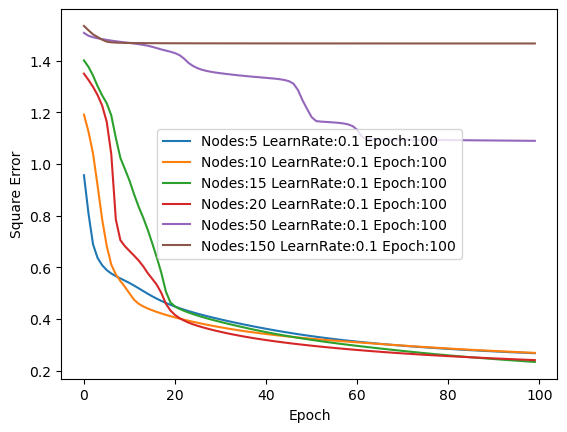

In [20]:
data_1 = [[1.58, 2.32, -5.8], [0.67, 1.58, -4.78], [1.04, 1.01, -3.63],
          [-1.49, 2.18, -3.39], [-0.41, 1.21, -4.73], [1.39, 3.16, 2.87],
          [1.20, 1.40, -1.89], [-0.92, 1.44, -3.22], [0.45, 1.33, -4.38],
          [-0.76, 0.84, -1.96]]
data_2 = [[0.21, 0.03, -2.21], [0.37, 0.28, -1.8], [0.18, 1.22, 0.16],
          [-0.24, 0.93, -1.01], [-1.18, 0.39, -0.39], [0.74, 0.96, -1.16],
          [-0.38, 1.94, -0.48], [0.02, 0.72, -0.17], [0.44, 1.31, -0.14],
          [0.46, 1.49, 0.68]]
data_3 = [[-1.54, 1.17, 0.64], [5.41, 3.45, -1.33], [1.55, 0.99, 2.69],
          [1.86, 3.19, 1.51], [1.68, 1.79, -0.87], [3.51, -0.22, -1.39],
          [1.40, -0.44, -0.92], [0.44, 0.83, 1.97], [0.25, 0.68, -0.99],
          [0.66, -0.45, 0.08]]
data_input = [data_1, data_2, data_3]
n_hs = [5, 10, 15, 20, 50, 150]
bk_types = ['single', 'batch']
etas = [1e-3, 1e-2, 0.1, 0.5, 1]
epoch_nums = [50, 100, 150]
# generate train_data, train_label
train_data, train_label = generate_label(data_input)
# network train
net1 = network(train_data, train_label, n_hs[0])
net1.train(bk_types[1], etas[2], epoch_nums[1])

net2 = network(train_data, train_label, n_hs[1])
net2.train(bk_types[1], etas[2], epoch_nums[1])

net3 = network(train_data, train_label, n_hs[2])
net3.train(bk_types[1], etas[2], epoch_nums[1])

net4 = network(train_data, train_label, n_hs[3])
net4.train(bk_types[1], etas[2], epoch_nums[1])

net5 = network(train_data, train_label, n_hs[4])
net5.train(bk_types[1], etas[2], epoch_nums[1])

net6 = network(train_data, train_label, n_hs[5])
net6.train(bk_types[1], etas[2], epoch_nums[1])
# plot error graph
plt.legend(loc='best')
plt.xlabel('Epoch')
plt.ylabel('Square Error')
plt.savefig('num_hidden.png',format='png')
plt.show()

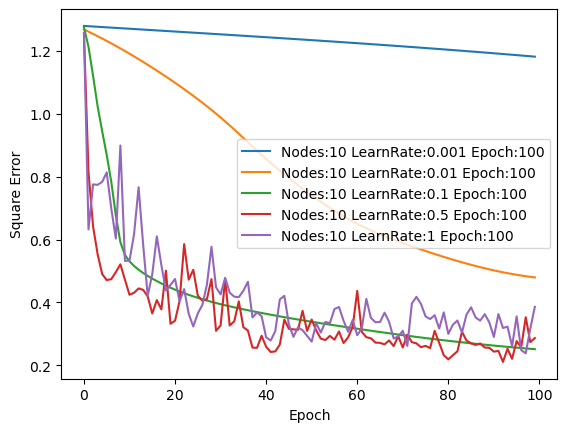

In [21]:
# Different eta
net1 = network(train_data, train_label, n_hs[1])
net1.train(bk_types[1], etas[0], epoch_nums[1])

net2 = network(train_data, train_label, n_hs[1])
net2.train(bk_types[1], etas[1], epoch_nums[1])

net3 = network(train_data, train_label, n_hs[1])
net3.train(bk_types[1], etas[2], epoch_nums[1])

net4 = network(train_data, train_label, n_hs[1])
net4.train(bk_types[1], etas[3], epoch_nums[1])

net5 = network(train_data, train_label, n_hs[1])
net5.train(bk_types[1], etas[4], epoch_nums[1])

# plot error graph
plt.legend(loc='best')
plt.xlabel('Epoch')
plt.ylabel('Square Error')
plt.savefig('eta.png',format='png')
plt.show()

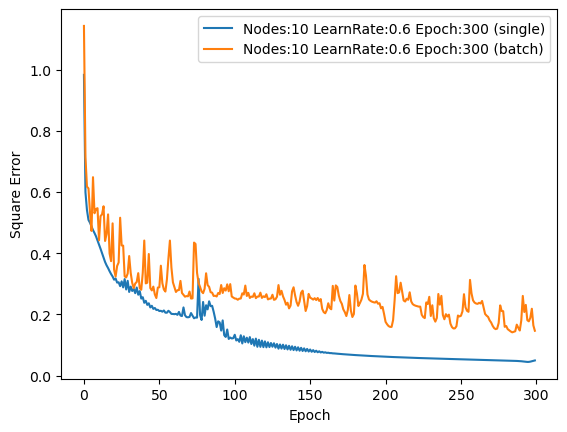

In [27]:
# Different methods of updating
net1 = network(train_data, train_label, n_hs[1])
net1.train(bk_types[0], 0.6, 300)

net2 = network(train_data, train_label, n_hs[1])
net2.train(bk_types[1], 0.6, 300)

plt.legend(loc='best')
plt.xlabel('Epoch')
plt.ylabel('Square Error')
plt.savefig('batch.png',format='png')
plt.show()